# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
temp_units = "imperial"
from citipy import citipy
output_data_file = "cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | bara
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | nara
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | collie
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | lugoba
Processing Record 16 of Set 1 | villa carlos paz
Processing Record 17 of Set 1 | cascavel
Processing Record 18 of Set 1 | cagayan de tawi-tawi
Processing Record 19 of Set 1 | talara
Processing Record 20 of Set 1 | busselton
City not found. Skipping...
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | mangochi
Processing Record 23 of Set 1 | dubovskoye
Processing Record 24 of Set 1 | t

Processing Record 40 of Set 4 | gorontalo
Processing Record 41 of Set 4 | thompson
City not found. Skipping...
Processing Record 42 of Set 4 | mbabane
Processing Record 43 of Set 4 | manresa
Processing Record 44 of Set 4 | port moresby
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | soderhamn
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | kaa-khem
Processing Record 49 of Set 4 | adrar
Processing Record 1 of Set 5 | vardo
City not found. Skipping...
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | sungaipenuh
Processing Record 5 of Set 5 | ossora
Processing Record 6 of Set 5 | belica
Processing Record 7 of Set 5 | tukrah
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | mackay
Processing Record 10 of Set 5 | hirara
City not found. Skipping...
Processing Record 11 of Set 5 | bajo baudo
Processing Record 12 of Set 5 | culebra
Processing Record 13 of Set 5

Processing Record 31 of Set 8 | oistins
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | moron
City not found. Skipping...
Processing Record 34 of Set 8 | hailar
Processing Record 35 of Set 8 | kerrville
Processing Record 36 of Set 8 | rundu
Processing Record 37 of Set 8 | moose factory
City not found. Skipping...
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | luwuk
Processing Record 40 of Set 8 | santa rosa
Processing Record 41 of Set 8 | sabang
Processing Record 42 of Set 8 | babu
Processing Record 43 of Set 8 | jalingo
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | garowe
Processing Record 46 of Set 8 | yeniseysk
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | sturgeon bay
City not found. Skipping...
Processing Record 49 of Set 8 | biltine
Processing Record 1 of Set 9 | tyrma
City not found. Skipping...
Processing Record 2 of Set 9 | husavik
Processing Record 3 of Set 9 | ahipara
Pr

City not found. Skipping...
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lebu,91,CL,1587235501,68,-37.62,-73.65,64.29,6.55
1,mataura,100,NZ,1587235369,93,-46.19,168.86,42.01,5.01
2,bara,65,NG,1587235303,9,10.37,10.73,92.21,2.04
3,punta arenas,20,PH,1587235499,77,8.99,125.34,77.34,5.01
4,nara,99,JP,1587235597,55,34.69,135.80,55.99,1.99


In [5]:
weather_dataframe.to_csv(output_data_file)
weather_dataframe.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

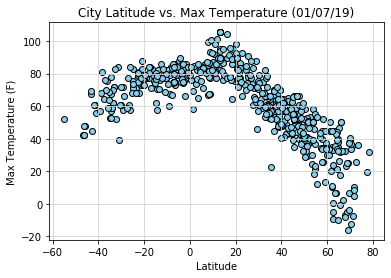

In [7]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("L+T.png")
plt.show()

#### Latitude vs. Humidity Plot

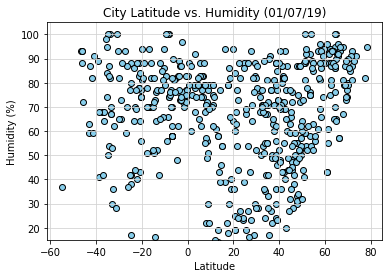

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("L+H.png")
plt.show()

#### Latitude vs. Cloudiness Plot

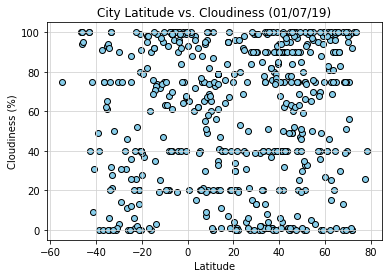

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("L+C.png")
plt.show()

#### Latitude vs. Wind Speed Plot

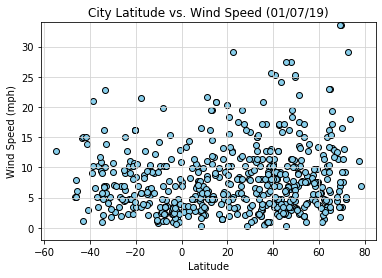

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("L+W.png")
plt.show()